In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

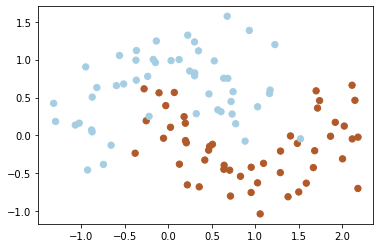

In [2]:
# generate and plot data
X, y = make_moons(noise=0.3, random_state=0)
#X, y = make_circles(noise=0.2, factor=0.5, random_state=1)


plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Paired)
plt.show()



sklearn.ensemble.AdaBoostClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

1. ***base_estimator*** object, default=None:  The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier(max_depth=1).
1. ***n_estimators*** int, default=50: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.


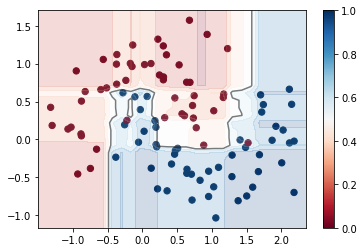

In [8]:
# fit AdaBoost with DecisionStump (1R) 
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=50)
clf = GradientBoostingClassifier()

clf.fit(X,y)

# visualize data and prediction

cm = plt.cm.RdBu

# plot data points
scatter=plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=cm)


# plot decision boundary/maximum margin hyperplane and margins
#  (xlim, ylim, xx, yy... refer to the axes, not the input and output of the classifier)
# get axes
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#  create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# run classifier for all points in the mesh
Z = clf.decision_function(xy).reshape(XX.shape)

# plot prediction and decision boundary
ax.contourf(XX, YY, Z, cmap=cm,  alpha=0.2)
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)

plt.colorbar()

plt.show()